# NLP Project: Pre-Processing Textual Data, Detecting Spam Or Ham Messages
## Project made by: Hadi Cheayto

This project focuses on preprocessing textual data for spam detection in SMS messages. 
By cleaning and transforming raw text through techniques like tokenization, stopword removal, and lemmatization, we prepare the data for efficient classification.
These preprocessing steps are essential in NLP, as they help extract relevant features and improve the model's ability to accurately distinguish between spam and non-spam messages.


We selected this dataset to perform a range of preprocessing tasks, preparing the data for detecting spam versus ham messages.

Source data set: kaggle 
https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


## Libraries used in our project:

#### libraries used during the pre-processing
1-pandas: A data manipulation library commonly used for handling tabular data and performing data preprocessing tasks.

2-numpy: A numerical computing library for handling arrays, mathematical functions, and large datasets.

3-re: The regular expressions module, used for text cleaning and pattern matching, crucial in text preprocessing.

4-warnings: Suppresses warnings that may arise during data processing or model training.

5-nltk: The Natural Language Toolkit, a comprehensive library for NLP tasks, including tokenization, stemming, and lemmatization.

6-stopwords (nltk.corpus): Part of NLTK, providing lists of common words to exclude in NLP tasks, improving model focus on meaningful terms.

7string: A standard Python library used for handling strings and removing punctuation.

8-word_tokenize (nltk.tokenize): Splits text into individual words or tokens, an essential step for NLP model preparation.

9-PorterStemmer (nltk.stem): A stemming algorithm in NLTK to reduce words to their root forms, aiding in consistency in text data.

10-WordNetLemmatizer (nltk.stem): A lemmatization tool in NLTK that converts words to their base forms, improving vocabulary standardization.
#### libraries used during the model development 

11- TfidfVectorizer (sklearn.feature_extraction.text): Converts text data into TF-IDF features, weighting terms by their importance in each document relative to the entire dataset, enhancing feature relevance.

12- train_test_split (sklearn.model_selection): Splits data into training and test sets, allowing for model training and evaluation on separate datasets.

13- SVC (sklearn.svm): Support Vector Classifier, a machine learning model for classification tasks, often effective in high-dimensional spaces like text data.

14- classification_report (sklearn.metrics): Generates a summary report of classification metrics, including precision, recall, and F1-score for model evaluation.

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import re
import warnings as wn
import string
wn.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


We imported the csv file.

In [2]:
df= pd.read_csv("spam.csv",encoding="ISO-8859-1")

We checked the first few rows of the dataset...

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


...And we checked the shape of the data.

In [4]:
df.shape

(5572, 5)

Our dataset consists of 5572 rows and 5 columns.

# DataFrame

Upon examining the dataset, we observed that it contains five columns, three of which are entirely null. 

Since only the first two columns are relevant to our analysis, we created a new DataFrame named df, containing only v1 and v2.

Additionally, we expanded the display setting, so we could check the full text in V2 


In [5]:
data=df[["v1","v2"]]
pd.set_option("display.max_colwidth",None)

This is the current shape of our data.

In [6]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


The dataframe we just created has 5572 rows and 2 columns.


## Dependent variable distribution between spam and ham

In [7]:
data["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

It is extremely important to work with a balanced dataset. 

By checking the distribution of the lables in V1 (spam or ham), we can see how many instances of each category we are dealing with.

Our data cotains 4825 ham messages and 747 spam messages, which is relatively balanced in our context.

# Visualization

In [8]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
df["length"] = df["v2"].apply(len)
df.sort_values(by='length', ascending=False).head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
1084,ham,For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..,NaN,NaN,NaN,910
1862,ham,"The last thing i ever wanted to do was hurt you. And i didn't think it would have. You'd laugh, be embarassed, delete the tag and keep going. But as far as i knew, it wasn't even up. The fact that you even felt like i would do it to hurt you shows you really don't know me at all. It was messy wednesday, but it wasn't bad. The problem i have with it is you HAVE the time to clean it, but you choose not to. You skype, you take pictures, you sleep, you want to go out. I don't mind a few things here and there, but when you don't make the bed, when you throw laundry on top of it, when i can't have a friend in the house because i'm embarassed that there's underwear and bras strewn on the bed, pillows on the floor, that's something else. You used to be good about at least making the bed.",NaN,NaN,NaN,790
2433,ham,"Indians r poor but India is not a poor country. Says one of the swiss bank directors. He says that \ &lt;#&gt; lac crore\"" of Indian money is deposited in swiss banks which can be used for 'taxless' budget for &lt;#&gt; yrs. Can give &lt;#&gt; crore jobs to all Indians. From any village to Delhi 4 lane roads. Forever free power suply to more than &lt;#&gt; social projects. Every citizen can get monthly &lt;#&gt; /- for &lt;#&gt; yrs. No need of World Bank &amp; IMF loan. Think how our money is blocked by rich politicians. We have full rights against corrupt politicians. Itna forward karo ki pura INDIA padhe.g.m.\""""",NaN,NaN,NaN,632
1578,ham,How to Make a girl Happy? It's not at all difficult to make girls happy. U only need to be... 1. A friend 2. Companion 3. Lover 4. Chef . . . &lt;#&gt; . Good listener &lt;#&gt; . Organizer &lt;#&gt; . Good boyfriend &lt;#&gt; . Very clean &lt;#&gt; . Sympathetic &lt;#&gt; . Athletic &lt;#&gt; . Warm . . . &lt;#&gt; . Courageous &lt;#&gt; . Determined &lt;#&gt; . True &lt;#&gt; . Dependable &lt;#&gt; . Intelligent . . . &lt;#&gt; . Psychologist &lt;#&gt; . Pest exterminator &lt;#&gt; . Psychiatrist &lt;#&gt; . Healer . . &lt;#&gt; . Stylist &lt;#&gt; . Driver . . Aaniye pudunga venaam..,NaN,NaN,NaN,611
2847,ham,"Sad story of a Man - Last week was my b'day. My Wife did'nt wish me. My Parents forgot n so did my Kids . I went to work. Even my Colleagues did not wish. As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there. She said,'' do u mind if I go into the bedroom for a minute ? '' ''OK'', I sed in a sexy mood. She came out 5 minuts latr wid a cake...n My Wife, My Parents, My Kidz, My Friends n My Colleagues. All screaming.. SURPRISE !! and I was waiting on the sofa.. ... ..... ' NAKED...!",NaN,NaN,NaN,588
2157,ham,"Sad story of a Man - Last week was my b'day. My Wife did'nt wish me. My Parents forgot n so did my Kids . I went to work. Even my Colleagues did not wish. As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We w

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

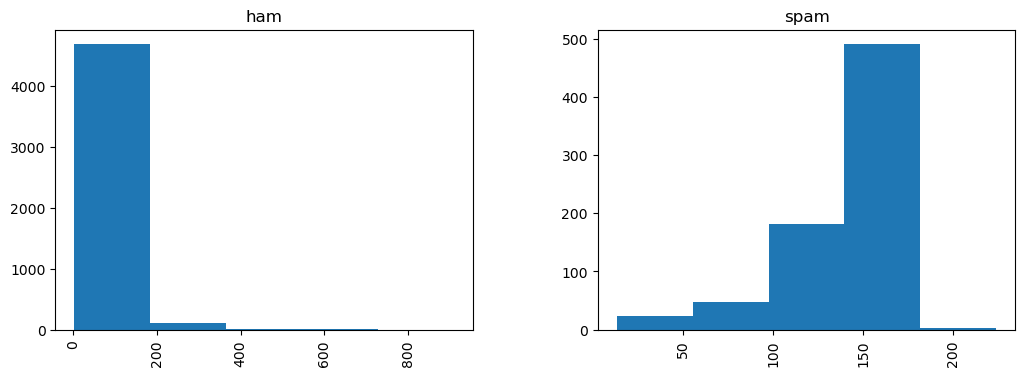

In [10]:
df.hist(column = 'length', by ='v1',figsize=(12,4), bins = 5)

We visualized the distribution of length of ham messages and spam messages.
we notice that ham messages are greater in length than spam messages which tend to be way shorter.

# Steps to Clean the Data
## 1-Punctuation Removal
This step involves removing all the punctuation from the text. String library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In order to do that, we imported the library re.

We created the function remove-punctuation() to remove punctuation using regex

In [11]:
def remove_punctuation(text):
    punctuationfree = re.sub(r'[^\w\s]', '', text)  # here we removed anything that's not a word character or whitespace
    return punctuationfree

# stored the punctuation free text in a new column named clean_msg
data['clean_msg'] = data['v2'].apply(remove_punctuation)
data.head()

,v1,v2,clean_msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


We removed all the punctuations from v2 and stored them in the clean_msg column

## 2- Lowering the Text

Converting the text into the same case, preferably lowercase, is one of Python’s most common text preprocessing steps. However, doing this step every time we work on an NLP problem is unnecessary, as lower casing can sometimes lead to a loss of information.

In [12]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())
data

,v1,v2,clean_msg,msg_lower
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though
...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",This is the 2nd time we have tried 2 contact u U have won the å750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,this is the 2nd time we have tried 2 contact u u have won the å750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate
5568,ham,Will Ì_ b going to esplanade fr home?,Will Ì_ b going to esplanade fr home,will ì_ b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions,pity was in mood for that soany other suggestions
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,The guy did some bitching but I acted like id be interested in buying something else next week and he gave it to us for free,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free


We created a new column "msg_lower" either way, because it'll be useful in our case.

# 3- Tokenization
In this step, the text is split into smaller units. Based on our problem statement, we can use sentence or word tokenization.

We defined a new function "tokenization" and applied it on the lower cased messages.

In [13]:
def tokenization(text):
    tokens= word_tokenize(text)
    return tokens
#applying function to the msg_lower column
data["msg_tokenized"]= data["msg_lower"].apply(lambda x: tokenization(x))
data.head()


,v1,v2,clean_msg,msg_lower,msg_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


## 4- Stop Word Removal
We remove commonly used stopwords from the text because they do not add value to the analysis and carry little or no meaning.

NLTK library consists of a list of stopwords considered stopwords in the English language.

Some of them are : [i, me, my, myself, we, our, ours, ourselves, you, you’re, you’ve, you’ll, you’d, your, yours, yourself, yourselves, he, most, other, some, such, no, nor, not, only, own, same, so, then, too, very, s, t, can, will, just, don, don’t, should, should’ve, now, d, ll, m, o, re, ve, y, ain, aren’t, could, couldn’t, didn’t, didn’t]


However, using the provided list of stopwords is unnecessary, as they should be chosen wisely based on the project. 

For example, ‘How’ can be a stopword for a model but can be important for some other problem where we are working on customers’ queries. 

We can create a customized list of stopwords for different problems.

We defined a new function "remove stopwords" and applied it to the tokenized messages.

In [14]:
def remove_stopwords(words):
    words = [w for w in words if w not in stopwords.words("english")]
    return words

data["removed_stopwords"] = data["msg_tokenized"].apply(lambda x: remove_stopwords(x))

This is the current shape of our data.

In [15]:
data.head()

,v1,v2,clean_msg,msg_lower,msg_tokenized,removed_stopwords
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


## 5- Stemming
This step, known as text standardization, stems or reduces words to their root or base form. For example, we stem words like ‘programmer,’ ‘programming,’ and ‘program’ to ‘program.’

In [16]:
#defined the object for stemming, with the help of the library nltk.stem
porter=PorterStemmer()

Defined a new function "stemming" and applied it to the removed stopwords column.

In [17]:
def stemming(text):
    stem_next=[porter.stem(word) for word in text]
    return stem_next
data["msg_stemmed"]=data["removed_stopwords"].apply(lambda x:stemming(x))

This is the current shape of our data.

In [18]:
data.head()

,v1,v2,clean_msg,msg_lower,msg_tokenized,removed_stopwords,msg_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]"
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


## 6- Lemmatization
Lemmatization reduces words to their base or root form (lemma) while preserving their meaning. 

Unlike stemming, it uses a predefined dictionary to check word context, ensuring meaningful transformations.

We imported wordnetlemmatizer from nltk stem, so we could define the object for lemmatization.

In [19]:
wordnet_lemmatizer = WordNetLemmatizer()

We defined the function lemmatizer and applied it to the removed stopwords column.

In [20]:
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data['msg_lemmatized']=data['removed_stopwords'].apply(lambda x:lemmatizer(x))

This is the current shape of our data.

In [21]:
data.head()

,v1,v2,clean_msg,msg_lower,msg_tokenized,removed_stopwords,msg_stemmed,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"


In [22]:
data['processed_text'] = data['msg_lemmatized'].apply(lambda x: ' '.join(x))
data.head()

,v1,v2,clean_msg,msg_lower,msg_tokenized,removed_stopwords,msg_stemmed,msg_lemmatized,processed_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]",free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though


In the first row of msg_stemmed, the word "crazy" has been changed to "crazi" which has no meaning. However in msg_lemmatized, the word "crazy" remained the same.

In the last row of msg_stemmed, the word "goes" has been changed to "goe". However in msg_lemmatized, it has been changed into "go", which is a real word with meaning.

# Beyond Pre-Processing: 
## TF-IDF and Classification Model Development

First we defined a custom tokenizer function for the vectorizer.

Then we used TfidfVectorizer, which uses transform_message to preprocess and convert the textual data into numerical TF-IDF features.

After that, the processed data is split into training and test sets with a 70-30 split, allowing for model training and evaluation on separate data subsets.

Finally we prepared the text data for effective use in the ML model.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorization = CountVectorizer()
X = vectorization.fit_transform(data['processed_text'])

tfidf_transformer = TfidfTransformer().fit(X)
X_tfidf = tfidf_transformer.transform(X)

data = data.rename(columns={'v1': 'label', 'v2': 'original_text'})
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.30, random_state=50)


In [24]:
# model training
clf = SVC(kernel='linear').fit(X_train, y_train)

# predictions and evaluation
predictions = clf.predict(X_test)
report_df = pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).transpose()
print(report_df)


              precision    recall  f1-score     support
ham            0.971937  0.995792  0.983720  1426.00000
spam           0.971564  0.833333  0.897155   246.00000
accuracy       0.971890  0.971890  0.971890     0.97189
macro avg      0.971751  0.914563  0.940438  1672.00000
weighted avg   0.971882  0.971890  0.970984  1672.00000


In [25]:
# Assuming all previous steps have been done and the model (clf) is trained

def preprocess_input(text):

    text = remove_punctuation(text) 
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words("english")]
    tokens = [wordnet_lemmatizer.lemmatize(word) for word in tokens]  
    return ' '.join(tokens)

# Example message to test
new_message = "Send this message to 5 others to win a ticket to istanbul"

preprocessed_message = preprocess_input(new_message)
X_new = vectorization.transform([preprocessed_message])  # Use the same vectorizer used during training
predicted_label = clf.predict(X_new)
print("Predicted Label:", predicted_label[0]) 

Predicted Label: spam


What we essentially did here, is that we implemented a text classification pipeline using an SVM (Support Vector Machine) model to classify text data. 

The process begins by defining a transform_message function to clean and preprocess each message by removing punctuation and stopwords.

 The cleaned text is then vectorized using CountVectorizer, which tokenizes and transforms it into a bag-of-words representation, followed by TF-IDF transformation with TfidfTransformer to weight terms based on their importance across messages.
 
  The data is split into training and testing sets, with the train_test_split function, and an SVM classifier with a linear kernel is trained on the processed training data. 
  
  After predicting the classes for the test set, a classification report is generated to evaluate the model’s performance, summarizing metrics like precision, recall, and F1-score in a more readable DataFrame format.

# Conclusion
In this project, we successfully preprocessed textual data to classify SMS messages as spam or ham. 

Through various preprocessing steps, including tokenization, stopword removal, stemming, and lemmatization.
We cleaned and standardized the data, making it suitable for training a classification model. 

Since we had a lot of time on our hands, we decided to develop the project further.
In fact we developed and trained a Support Vector Machine (SVM) classifier, using the processed text data to achieve reliable predictions. 

The preprocessing techniques we used not only reduced noise but also preserved the essential meaning and context of the text, enabling more accurate classification.

This groundwork in text preprocessing is critical for building effective machine learning models in NLP, as it enhances model performance by focusing on meaningful data features.